# Introduction: Treating Text as Data

* Text as data and language as measure

* What are corpus linguistics and natural language processing?

* Counting words and finding patterns in language

<img src="img/text_as_data1.png" width="600"/>

<img src="img/text_as_data2.png" width="600"/>

In [37]:
%matplotlib inline
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

df = pd.read_csv('student_survey_responses_1-23-19.csv')
df2 = df.iloc[2:,]
df2 = df2[-pd.isnull(df2.Q8)]

<img src="img/survey_item.png" width="100%"/>

In [38]:
df2.Q8.value_counts()

None at all          17
A little              4
A moderate amount     3
A lot                 1
Name: Q8, dtype: int64

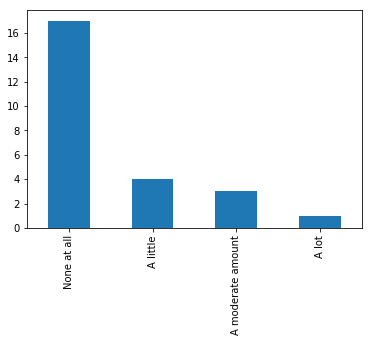

In [39]:
df2.Q8.value_counts().plot.bar();

In [40]:
python_vals = ['A great deal', 'A lot', 'A moderate amount', 'A little', 'None at all']
python_experience = dict(zip(python_vals,[0]*5))
python_experience.update(dict(df2.Q8.value_counts()))
python_experience

{'A great deal': 0,
 'A little': 4,
 'A lot': 1,
 'A moderate amount': 3,
 'None at all': 17}

Text(0.5,1,'What is your Python programming experience?')

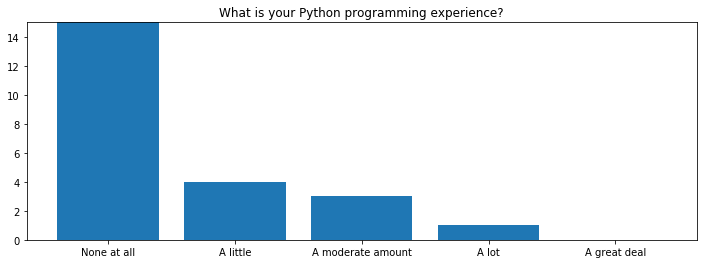

In [41]:
python_vals.reverse()
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(111)
ax.set_ylim(0,15)
plt.bar(range(5), [python_experience[k] for k in python_vals], width=.8, tick_label=python_vals, align='center')
plt.title('What is your Python programming experience?')


<img src="img/text_as_data2.png" width="600"/>

<img src="img/text_as_data3.png" width="600"/>

In [42]:
print(df2.Q13.values[:5])

[ 'I am interested in social media communication. One day I would love to be involved in media production of some sort. I thought this class was extremely appealing, and after talking to a Communications mentor, was told it would be very interesting and helpful. I am trying to branch out a bit from my media effects type classes and become a bit more hands-on. '
 'I am interested in taking this course because of the vast range of ways in which communication tactics can persuade an online audience especially.  The majority of marketing a ad campaigns take place in a digital setting, so I am hoping that this course offers critiques of communication strategiesi in a digital setting. '
 "I'm interested in political communication and media effects. For example, it would be interesting to analyze how the rhetoric of female Republican politicians changed since the 2016 election and especially those who self-proclaimed as feminists. Another example would be analyzing people's reactions on twitt

In [43]:
responses = [t.split() for t in df2.Q13.values]

(-0.5, 399.5, 199.5, -0.5)

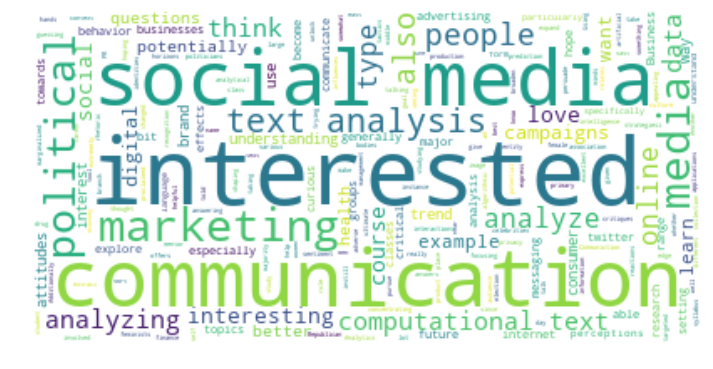

In [44]:
from wordcloud import WordCloud

text='\n'.join([' '.join(resp) for resp in responses])
wordcloud = WordCloud(background_color='white', prefer_horizontal=0.5).generate(text)
fig = plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [45]:
from collections import Counter
responses=[t.lower().split() for t in df2.Q13.str.replace('[\.?\-,()):]','')]
freq_dist = Counter()
for tokens in responses:
    freq_dist.update(tokens)

In [46]:
freq_dist.most_common(20)

[('in', 45),
 ('and', 44),
 ('i', 32),
 ('media', 28),
 ('to', 28),
 ('interested', 26),
 ('of', 22),
 ('social', 20),
 ('the', 18),
 ('am', 17),
 ('communication', 15),
 ('a', 15),
 ('how', 12),
 ('marketing', 11),
 ("i'm", 9),
 ('political', 9),
 ('text', 9),
 ('be', 8),
 ('analysis', 8),
 ('would', 7)]

In [47]:
phrases = Counter()
for resp in responses:
    phrases.update(["{}_{}".format(resp[t],resp[t+1]) for t in range(len(resp)-1)])
    phrases.update(["{}_{}_{}".format(resp[t],resp[t+1], resp[t+2]) for t in range(len(resp)-2)])

In [48]:
phrases.most_common(20)

[('interested_in', 26),
 ('social_media', 18),
 ('i_am', 15),
 ('am_interested', 7),
 ('am_interested_in', 7),
 ('i_am_interested', 6),
 ("i'm_interested", 6),
 ('communication_and', 6),
 ("i'm_interested_in", 6),
 ('in_the', 6),
 ('text_analysis', 6),
 ('in_social', 5),
 ('would_be', 5),
 ('interested_in_social', 5),
 ('in_social_media', 5),
 ('political_communication', 4),
 ('computational_text', 4),
 ('computational_text_analysis', 4),
 ('and_social', 4),
 ('marketing_and', 4)]

In [49]:
df2.Q13

2     I am interested in social media communication....
3     I am interested in taking this course because ...
4     I'm interested in political communication and ...
5     I'm interested in social media, political comm...
6     I am interested in how association with variou...
7     Interested in health communication and w.r.t c...
8     I’m interested in health communication and soc...
9     As a student concentrating in Marketing and Bu...
10    I am most interested in political communicatio...
11             Political Communiction, and Social Media
12                           Social media communication
13    I'm interested in advertising, marketing, the ...
14    I am very interested in studying marketing and...
15    I'm particularly interested in marketing commu...
16    I'm interested in media studies generally, but...
17    I am a Linguistics major and an interested in ...
18    social media, social phenomenon, public attitu...
19    I'm interested in media and communications

In [50]:
import graphviz
import networkx as nx

DG = nx.DiGraph()

for resp in responses:
    for i in range(min(len(resp)-1,4)):
        if i==0:
            try:
                DG['[START]'][resp[i]]['weight']+=1
            except:
                DG.add_edge('[START]',resp[i], weight=1)           
        try:
            DG[resp[i]][resp[i+1]]['weight']+=1
        except:
            DG.add_edge(resp[i],resp[i+1], weight=1)

In [51]:
G = graphviz.Digraph()
for edge in DG.edges(data=True):
    G.edge(edge[0], edge[1], penwidth=str(edge[2]['weight']))
    
G.node('[START]', shape='square')
G.attr('graph',rankdir='LR')

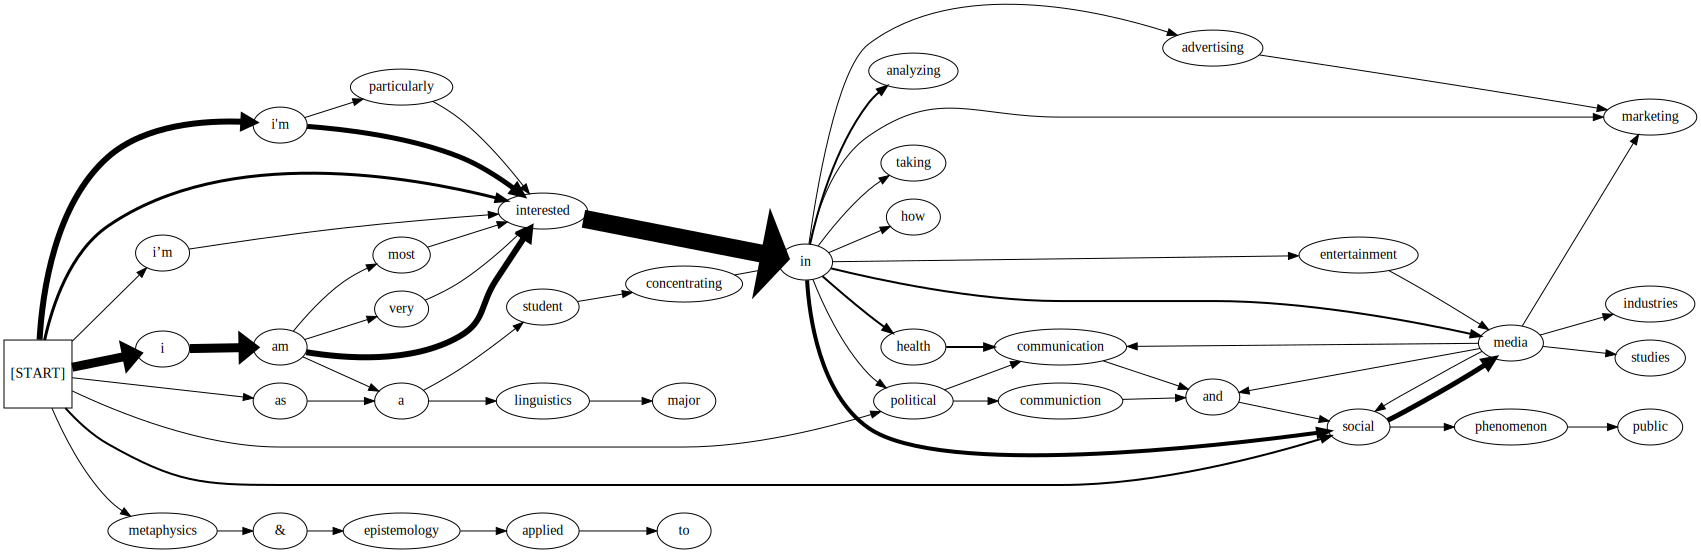

In [52]:
G

<img src="img/text_as_data4.png" width="800"/>

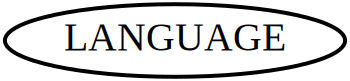

In [53]:
L = graphviz.Digraph(engine='neato')
L.graph_attr['rankdir']='BT'
L.graph_attr['overlap']='scalexy'
L.node('LANGUAGE', penwidth="4", fontsize="40")
L

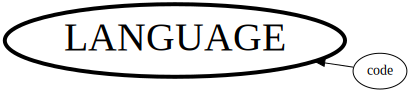

In [54]:
L.edge('code','LANGUAGE')
L

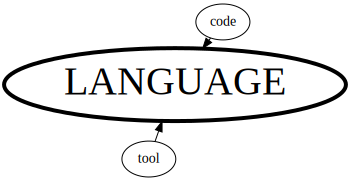

In [15]:
L.edge('tool','LANGUAGE')
L

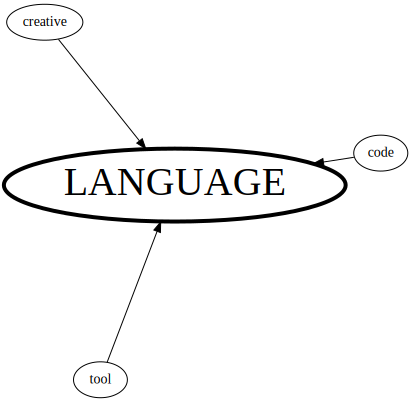

In [16]:
L.edge('creative','LANGUAGE')
L

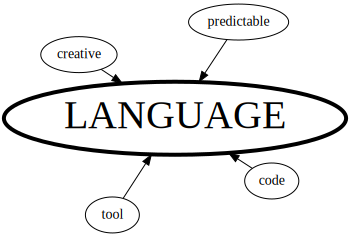

In [17]:
L.edge('predictable','LANGUAGE')
L

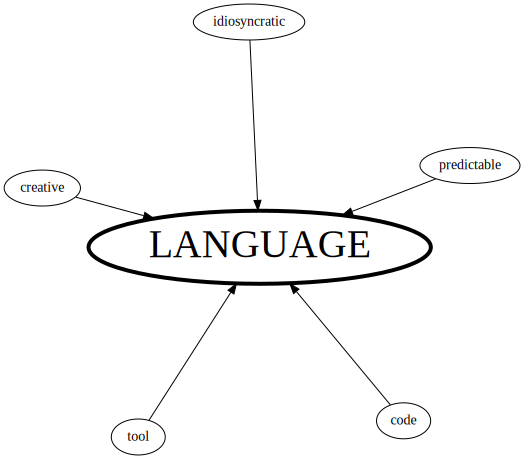

In [18]:
L.edge('idiosyncratic','LANGUAGE')
L

<img src="img/kfc.jpeg" />

<h1 style="line-height:2; text-align: center">“I took a tumble at the start 
<br/>
and somersaulted into the water,”
<br/>said Compton.
<br/>“It wasn’t awesome.”</h1>

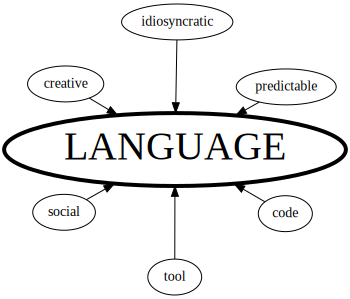

In [19]:
L.edge('social','LANGUAGE')
L

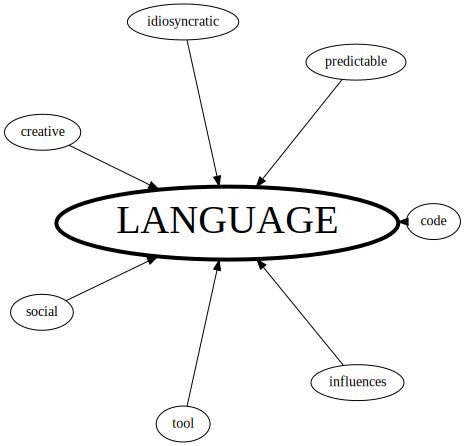

In [20]:
L.edge('influences','LANGUAGE')
L

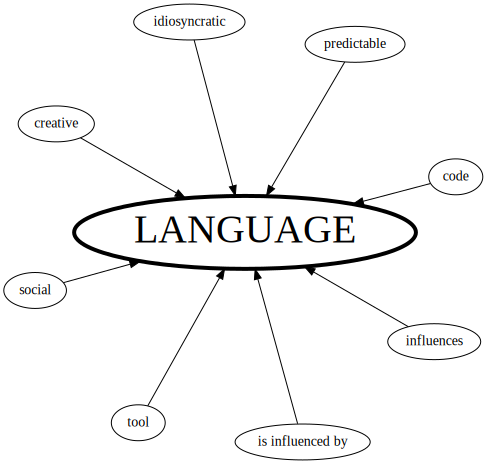

In [21]:
L.edge('is influenced by','LANGUAGE')
L